In [1]:
import numpy as np
import pandas as pd

In [86]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [63]:
df = pd.read_csv('/content/titanic_data.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [64]:
df =df.drop(columns=['Name','Ticket','Cabin'])
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C


In [65]:
y = df['Survived']
X = df.drop(columns=['Survived'],axis=1)

In [66]:
X.isna().sum()

,0
PassengerId,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [68]:
X_cols = X.columns
X_cols

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [69]:
cat_cols = X.select_dtypes(include='object').columns
cat_cols

Index(['Sex', 'Embarked'], dtype='object')

In [70]:
num_cols = X.select_dtypes(include='number').columns
num_cols

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [72]:
impute = SimpleImputer(strategy='most_frequent')
X = pd.DataFrame(impute.fit_transform(X))
X.columns = X_cols
X.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.25,S
1,2,1,female,38.0,1,0,71.2833,C


In [73]:
X.isna().sum()

,0
PassengerId,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [74]:
type(X)

pandas.core.frame.DataFrame

In [75]:
X.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [76]:
transformer = ColumnTransformer(
    transformers = [
        ('ohe',OneHotEncoder(drop='first'),cat_cols),
        ('scaler',StandardScaler(),num_cols)
    ]
)

In [77]:
X_transformed = transformer.fit_transform(X)

In [78]:
transformer

ColumnTransformer(transformers=[('ohe', OneHotEncoder(drop='first'),
                                 Index(['Sex', 'Embarked'], dtype='object')),
                                ('scaler', StandardScaler(),
                                 Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object'))])

In [79]:
parameters = {
    'criterion' : ['gini','entropy'],
    'splitter' : ['best','random'],
    'max_depth' : [2,3,4,5]
}

In [80]:
grid = GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [82]:
best_params = grid.fit(X_transformed,y)

In [83]:
best_params

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X_transformed,y,test_size=0.2,random_state=42)

In [85]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=4,splitter='best')
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

In [92]:
X.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

[Text(0.5089285714285714, 0.9, 'x[0] <= 0.5\nentropy = 0.955\nsamples = 712\nvalue = [444, 268]\nclass = 0'),
 Text(0.2857142857142857, 0.7, 'x[4] <= 0.229\nentropy = 0.829\nsamples = 245\nvalue = [64, 181]\nclass = 1'),
 Text(0.39732142857142855, 0.8, 'True  '),
 Text(0.14285714285714285, 0.5, 'x[3] <= -0.564\nentropy = 0.235\nsamples = 130\nvalue = [5, 125]\nclass = 1'),
 Text(0.07142857142857142, 0.3, 'x[5] <= -1.976\nentropy = 0.513\nsamples = 35\nvalue = [4, 31]\nclass = 1'),
 Text(0.03571428571428571, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.10714285714285714, 0.1, 'entropy = 0.431\nsamples = 34\nvalue = [3, 31]\nclass = 1'),
 Text(0.21428571428571427, 0.3, 'x[8] <= 2.243\nentropy = 0.084\nsamples = 95\nvalue = [1, 94]\nclass = 1'),
 Text(0.17857142857142858, 0.1, 'entropy = 0.0\nsamples = 82\nvalue = [0, 82]\nclass = 1'),
 Text(0.25, 0.1, 'entropy = 0.391\nsamples = 13\nvalue = [1, 12]\nclass = 1'),
 Text(0.42857142857142855, 0.5, 'x[8] <= -0.178\ne

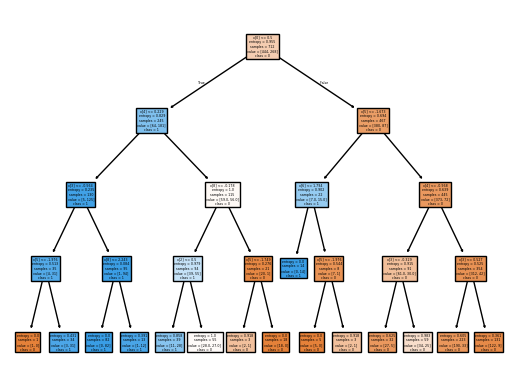

In [95]:
plot_tree(dtc,class_names=['0','1'],filled=True)